# Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

In [ ]:
# Se importan las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## K-Medias

**Datos de segmentación de clientes de centros comerciales**

Acerca del conjunto de datos

- Contexto

Este conjunto de datos se crea únicamente con fines de aprendizaje de los conceptos de segmentación de clientes, también conocido como análisis de la cesta de la compra. Demostraré esto usando la técnica de aprendizaje automático no supervisado (algoritmo de agrupamiento de KMeans) en la forma más simple.

- Contenido

Debe un supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como la identificación del cliente, la edad, el sexo, los ingresos anuales y el puntaje de gastos.
Spending Score es algo que asigna al cliente en función de sus parámetros definidos, como el comportamiento del cliente y los datos de compra.

- Declaración del problema

Usted es dueño del centro comercial y desea comprender a los clientes como quiénes pueden converger fácilmente (Clientes objetivo) para que se le pueda dar sentido al equipo de marketing y planificar la estrategia en consecuencia.



In [ ]:
df_mall = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Proyecto/Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


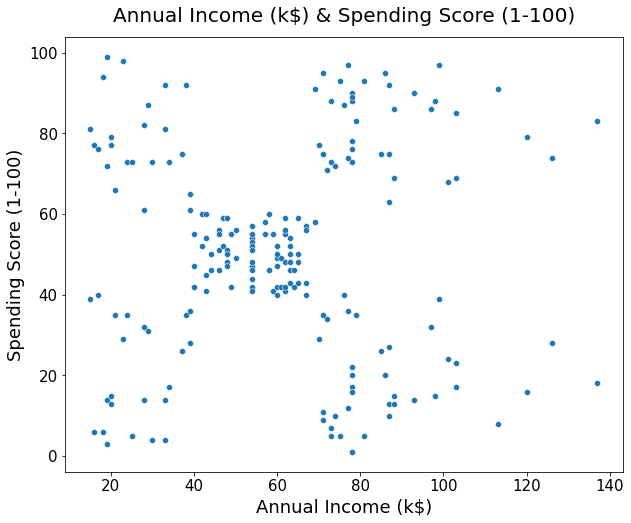

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.set_title('Annual Income (k$) & Spending Score (1-100)', fontsize=20, pad=15)
ax.set_xlabel('Annual Income (k$)', fontsize=18)
ax.set_ylabel('Spending Score (1-100)', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.scatterplot(df_mall, x = df_mall['Annual Income (k$)'], y = df_mall['Spending Score (1-100)'], ax=ax);

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=5, max_iter=10000)

In [ ]:
k_means.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=5)

In [ ]:
centers = k_means.cluster_centers_

centers = pd.DataFrame(centers)
centers = centers.rename({0: 'X', 1: 'Y'}, axis=1)
centers

,X,Y
0,88.200000,17.114286
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


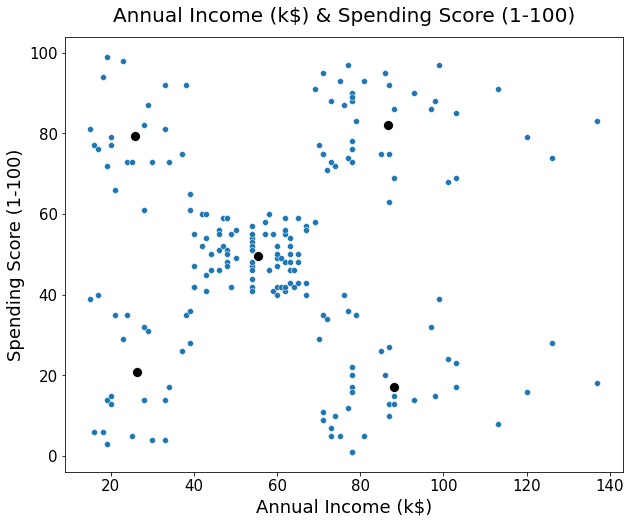

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.set_title('Annual Income (k$) & Spending Score (1-100)', fontsize=20, pad=15)
ax.set_xlabel('Annual Income (k$)', fontsize=18)
ax.set_ylabel('Spending Score (1-100)', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.scatterplot(df_mall, x = df_mall['Annual Income (k$)'], y = df_mall['Spending Score (1-100)'], ax=ax);
sns.scatterplot(centers, x = centers['X'], y = centers['Y'], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor los grupos:

In [ ]:
clasificaciones = k_means.predict(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

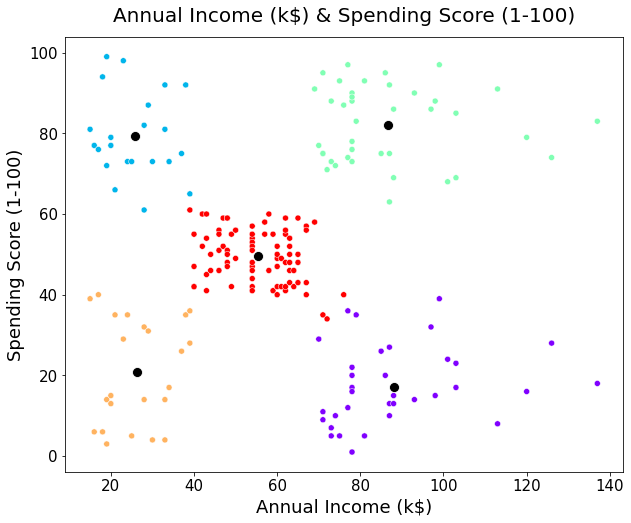

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.set_title('Annual Income (k$) & Spending Score (1-100)', fontsize=20, pad=15)
ax.set_xlabel('Annual Income (k$)', fontsize=18)
ax.set_ylabel('Spending Score (1-100)', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.scatterplot(df_mall, x = df_mall['Annual Income (k$)'], y = df_mall['Spending Score (1-100)'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers, x = centers['X'], y = centers['Y'], ax=ax, s=100, color='black');

ax.get_legend().remove()

----

## Regresión logística

**Infecciones postparto**

Los datos mostrados en la tabla provienen de un estudio sobre ocurrencia de infecciones en mujeres con partos por cesárea. Los factores considerados son si la cesárea fue planeada o no, si había factores de riesgo extra (por ejemplo, diabetes y/o sobrepeso) y si se usó antibióticos como preventivo de infecciones o no. Deseamos evaluar el impacto de estos factores sobre la ocurrencia de infecciones postparto en casos de nacimientos por cesárea.

In [ ]:
# Se importan las librerías
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Proyecto/Infecciones_postp.csv')
df.head()

,Infecciones_postparto,Cesarea_planeada,Fact_riesgo,Uso_antibioticos
0,Si,Si,Si,Si
1,Si,Si,Si,No
2,Si,Si,Si,No
3,Si,Si,Si,No
4,Si,Si,Si,No


In [ ]:
df.shape

(251, 4)

In [ ]:
df['Infecciones_postparto'] = df['Infecciones_postparto'].apply(lambda x: 1 if x == 'Si' else 0)
df['Cesarea_planeada'] = df['Cesarea_planeada'].apply(lambda x: 1 if x == 'Si' else 0)
df['Fact_riesgo'] = df['Fact_riesgo'].apply(lambda x: 1 if x == 'Si' else 0)
df['Uso_antibioticos'] = df['Uso_antibioticos'].apply(lambda x: 1 if x == 'Si' else 0)
df.head(3)

,Infecciones_postparto,Cesarea_planeada,Fact_riesgo,Uso_antibioticos
0,1,1,1,1
1,1,1,1,0
2,1,1,1,0


Vamos a intentar entrenar un modelo de Regresión Logística para clasificar la ocurrencia o no ocurrencia de infecciones posparto.

In [ ]:
X = df.drop(columns=['Infecciones_postparto'])
y = df['Infecciones_postparto']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter=10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Ya que tenemos un modelo, podemos hacer predicciones utilizando el dataset de prueba:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

¿Cómo sabemos si esto es correcto o no? Bueno, LogisticRegression tiene un método `score` para obtener la exactitud del modelo:

In [ ]:
logreg.score(X_test, y_test)

0.8157894736842105

El score de este modelo se llama `mean accuracy` (exactitud promedio). Este valor puede encontrarse en un intervalo entre 0 y 1, con 1 siendo 'exactitud perfecta'. Como se puede observar este modelo es medianamente aceptable. 

Ahora vamos a obtener nuestra matriz de confusión y visualizarla:

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[47, 12],
       [ 2, 15]])

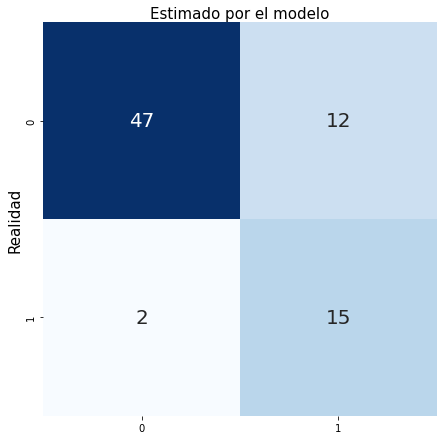

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Una vez obtenida nuestra matriz de confusión, podemos utilizar 4 medidas de evaluación llamadas: Precisión (Precision), Exactitud (Accuracy), Sensibilidad (Recall / Sensitivity) y Especificidad (Specificity). Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

`especificidad = VN / (VN + FP)`

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.5555555555555556
Exactitud: 0.8157894736842105
Sensibilidad: 0.8823529411764706
Especificidad: 0.7966101694915254


Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.47279908, 0.52720092],
       [0.47279908, 0.52720092],
       [0.47279908, 0.52720092],
       [0.81839401, 0.18160599],
       [0.47279908, 0.52720092],
       [0.47279908, 0.52720092],
       [0.47279908, 0.52720092],
       [0.81839401, 0.18160599],
       [0.81839401, 0.18160599],
       [0.34474167, 0.65525833]])

En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

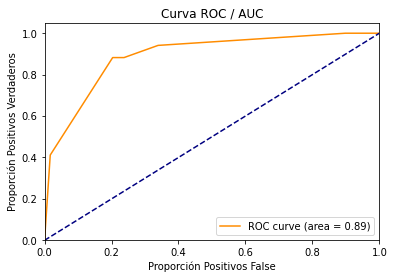

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como era de esperarse, nuestro valor AUC es cercano al 1. Esto significa que nuestro modelo puede diferenciar entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.

-----